# Курс Data Science
## 14.4. Домашняя работа

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

In [365]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Titanic_train.csv')

# Вычислим медианный возраст по полу
median_age_male = data['Age'][data['Sex']=='male'].median()
median_age_female = data['Age'][data['Sex']=='female'].median()

# Заполним пустые значения медианами исходя из пола
data['Age'][data['Sex'] == 'male'] = data['Age'].fillna(median_age_male)
data['Age'][data['Sex'] == 'female'] = data['Age'].fillna(median_age_female)

# Заполним пустые значения в колонках Cabin и Embarked
data['Cabin'] = data['Cabin'].fillna('U')
data['Embarked'] = data['Embarked'].fillna('U')

data = data.replace(['male','female'],[0,1])
data = data.replace(['U','S','C','Q'],[0,1,2,3])
data.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],
    axis=1,  # 1 - колонки, 0 - строки
    inplace=True  # Применить изменения прямо в датафрейме
)

from sklearn.model_selection import train_test_split 

data_target = data['Survived']
data_features = data.drop(
    columns=['Survived'],
    axis=1
)

X_train, X_test, y_train, y_test = train_test_split(
    data_features, 
    data_target, 
    random_state=17, 
    test_size=0.25
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

recall = recall_score(y_test, knn_predict)

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [366]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_test, knn_predict)

In [367]:
F1 = 2 * (precision * recall)/(precision + recall)

In [368]:
print(F1)
print(f1_score(y_test, knn_predict))

0.5696202531645569
0.5696202531645569


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [369]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [370]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()

knn_model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
gnb_model = gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
dtc_model = dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
lr_model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [371]:
def classificator_info(classificator, y_test, predicts):
    print(type(classificator))
    print('----------------')
    print(precision_recall_fscore_support(y_test, predicts))
    print(classification_report(y_test, predicts))

In [372]:
classificator_info(knn, y_test, knn_predict)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
----------------
(array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



In [373]:
classificator_info(gnb, y_test, gnb_predict)

<class 'sklearn.naive_bayes.GaussianNB'>
----------------
(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [374]:
classificator_info(dtc, y_test, dtc_predict)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
----------------
(array([0.8057554 , 0.77380952]), array([0.85496183, 0.70652174]), array([0.82962963, 0.73863636]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       131
           1       0.77      0.71      0.74        92

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [375]:
classificator_info(lr, y_test, lr_predict)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
----------------
(array([0.8028169 , 0.79012346]), array([0.87022901, 0.69565217]), array([0.83516484, 0.73988439]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       131
           1       0.79      0.70      0.74        92

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



### 2.3 

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.


1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [376]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [377]:
# 1
cv = StratifiedKFold(random_state=17, shuffle=True, n_splits=5)

In [378]:
# 2
Cs = np.logspace(-1, 2, 500)

In [379]:
# 3
lrcv = LogisticRegressionCV(Cs=Cs,cv=cv, scoring='roc_auc', random_state=17)


In [380]:
# 4
lrcv_model = lrcv.fit(X_train, y_train)

In [381]:
lrcv_predict = lrcv.predict(X_test)
recall_score(y_test, lrcv_predict)

0.6956521739130435

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [382]:
import matplotlib.pyplot as plt

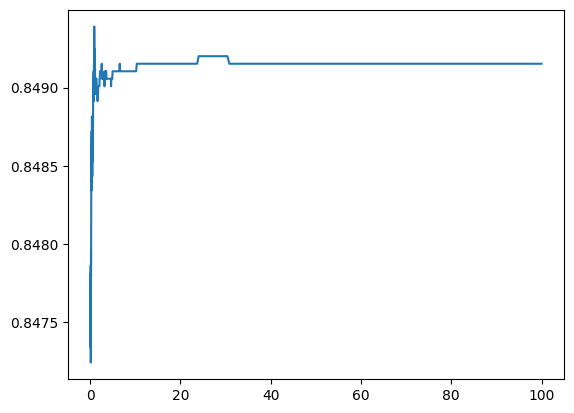

In [403]:
### YOUR CODE HERE ### 
means = 0
for i in range(5):
    means += lrcv_model.scores_[1][i]
means /=5

plt.plot(Cs, means)
plt.show()


### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [385]:
lrcv_model.C_

array([0.8787954])

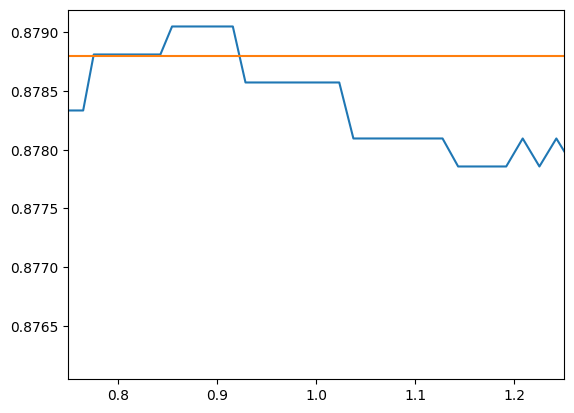

In [425]:
plt.plot(Cs, lrcv_model.scores_[1][2])
plt.xlim(0.75,1.25)
plt.plot((0,2),(lrcv_model.C_, lrcv_model.C_))
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [426]:
from sklearn.metrics import roc_auc_score, roc_curve

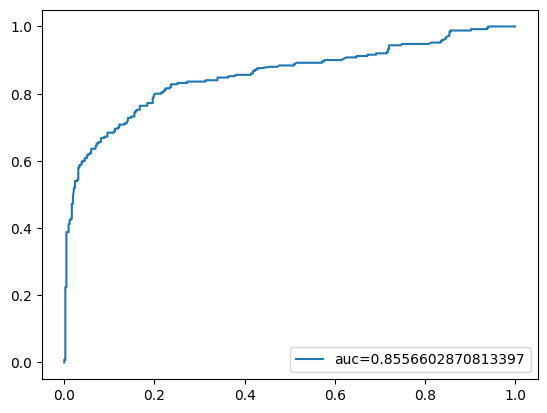

In [429]:
probas = lrcv_model.fit(X_train, y_train).predict_proba(X_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)